# Covid Scans Classification Using Simple Methods
## About
In this notebook we'll try to classify patients as having covid or not based on their scans. We'll use simple machine learning methods first, then we'll switch to CNNs on another notebook.

Data can be downloaded here : https://drive.google.com/file/d/1WS9WiABZM_ODhN6kSRoVSOik51mU3vI7/view

## Author : Abdelkader Nadir DEBBAGH (na.debbagh@gmail.com)

## Importing the Images using PIL

In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import glob
image_list_covid = []
image_list_non_covid = []
for filename in glob.glob('covid/COVID/*'): 
    im=Image.open(filename)
    image_list_covid.append(im)
for filename in glob.glob('covid/non-COVID/*'): 
    im=Image.open(filename)
    image_list_non_covid.append(im)

## Visualize some scans

### Covid-Positive scans

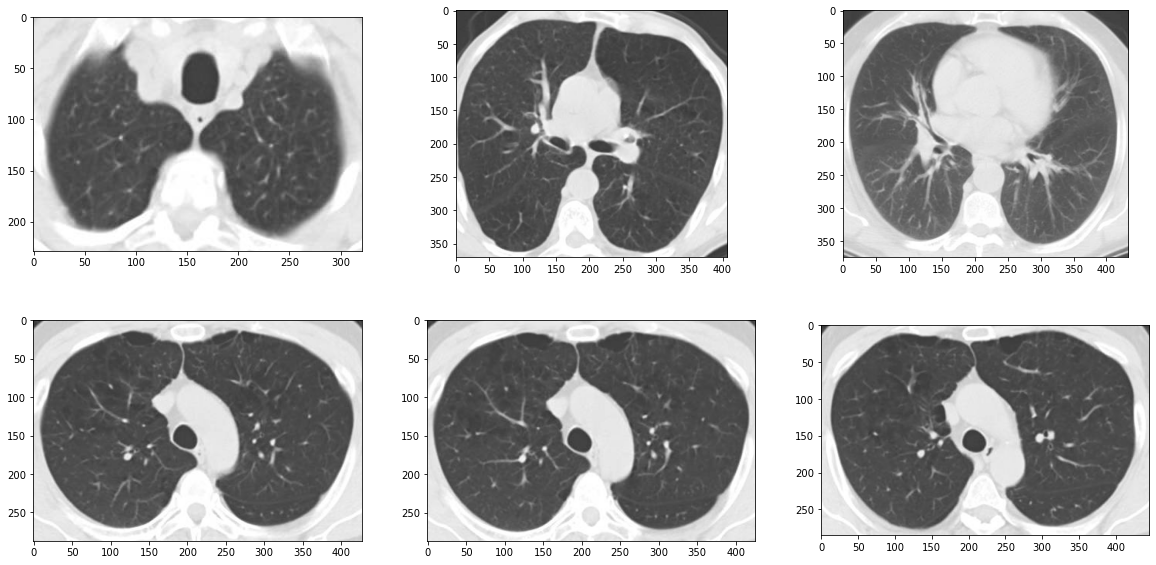

In [3]:
Nb_row = 2
Nb_col = 3
fig, axs = plt.subplots(Nb_row, Nb_col, figsize=(20,10))

for i,ax in enumerate(axs.flatten()):
    ax.imshow(image_list_non_covid[i])

### Covid-Negative scans

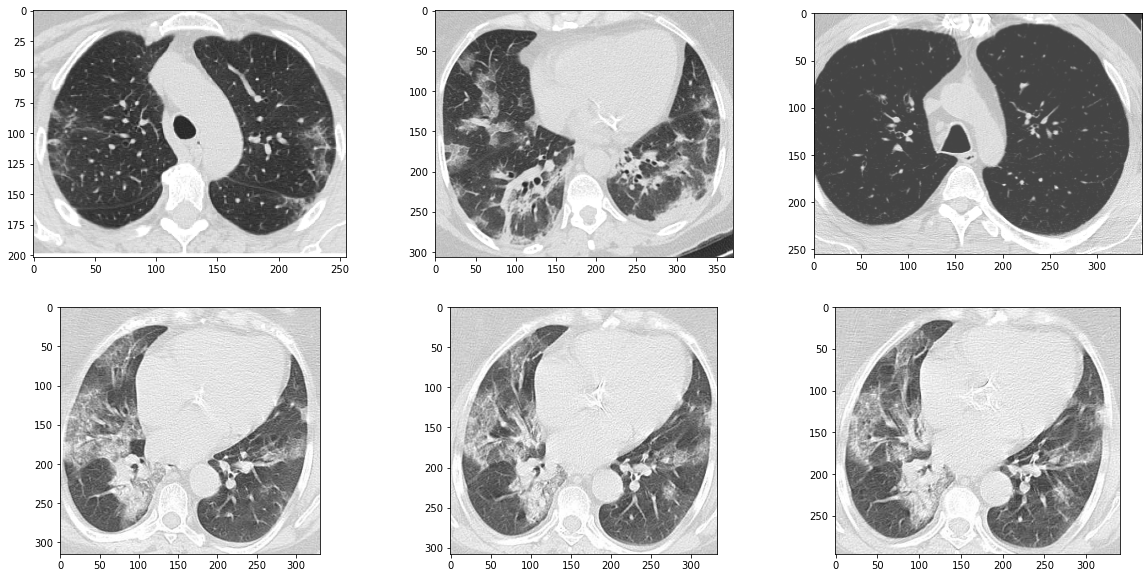

In [4]:
fig, axs = plt.subplots(Nb_row, Nb_col, figsize=(20,10))

for i,ax in enumerate(axs.flatten()):
    ax.imshow(image_list_covid[i])

## Preprocessing 

Here we have to :
 - First convert the images to Grayscale
 - Resize the images to a fixed size (100*100) for e.g
 - Flatten the data

In [5]:
# Convert resize and flatten
images_numpy_covid = []
WIDTH,HEIGHT = 100,100
for im in image_list_covid:
    images_numpy_covid.append(np.array(im.convert('LA').resize((WIDTH,HEIGHT)))[:,:,0].flatten())

images_numpy_no_covid = []
for im in image_list_non_covid:
    images_numpy_no_covid.append(np.array(im.convert('LA').resize((WIDTH,HEIGHT)))[:,:,0].flatten())

The images are now represented as 100*100 = 10000 * 1 vectors

In [6]:
images_numpy_no_covid[0].shape

(10000,)

We have 1252 Covid-Positive scans and 1229 Covid-Negative scans

In [7]:
len(images_numpy_covid)

1252

In [8]:
len(images_numpy_no_covid)

1229

### Generating the labels and the matrix of all images

The first `len(images_numpy_covid)` images are in class "1" (Positive). And the last `len(images_numpy_no_covid)` images are in class "0" (Negative).

We generate accordingly the labels vector `Y`

In [9]:
Y = [1] * len(images_numpy_covid)
Y.extend([0] * len(images_numpy_no_covid)) 

In [10]:
Y = np.array(Y)

Then we create the matrix of all image vectors by concatenating the two lists :

In [11]:
X = images_numpy_covid + images_numpy_no_covid

## Training the Model

In [13]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

First of all, we split our data into 70% Training and 30% Testing, and  then we'll try a bunch of very simple models before diving into more sophisticated ones :

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Logistic Regression

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
cl = LogisticRegression()

In [18]:
cl.fit(X_train, Y_train)

LogisticRegression()

Accuracy : 0.7771812080536913
F1-Score : 0.7700831024930748
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       383
           1       0.77      0.77      0.77       362

    accuracy                           0.78       745
   macro avg       0.78      0.78      0.78       745
weighted avg       0.78      0.78      0.78       745

Confusion Matrix


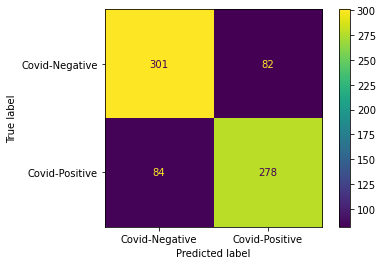

In [19]:
Y_pred = cl.predict(X_test)
print("Accuracy : {}".format(accuracy_score(Y_test, Y_pred)))
print("F1-Score : {}".format(f1_score(Y_test, Y_pred)))
print("Classification Report : ")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix")
conf_mat = confusion_matrix(Y_test, Y_pred, labels=cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Covid-Negative", "Covid-Positive"])
disp.plot();

Say that **classifying someone as negative when he is in fact positive** is worse than **classifying someone as positive when he is in fact negative**.

In this case it's okay if we have some false positives but we just don't want to miss positive cases. Because these could lead to death...

To consider this kind of decision rule, we need to set a different threshold for deciding the classes. 



In [20]:
Y_pred_probas = cl.predict_proba(X_test)
Y_pred_probas = Y_pred_probas[:,1]
DECISION_THRESHOLD = 0.2
Y_pred2 = (Y_pred_probas > DECISION_THRESHOLD).astype(int)

Accuracy : 0.7718120805369127
F1-Score : 0.7733333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       383
           1       0.75      0.80      0.77       362

    accuracy                           0.77       745
   macro avg       0.77      0.77      0.77       745
weighted avg       0.77      0.77      0.77       745

Confusion Matrix


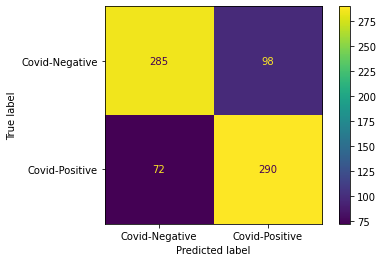

In [21]:
print("Accuracy : {}".format(accuracy_score(Y_test, Y_pred2)))
print("F1-Score : {}".format(f1_score(Y_test, Y_pred2)))
print("Classification Report : ")
print(classification_report(Y_test, Y_pred2))
print("Confusion Matrix")
conf_mat = confusion_matrix(Y_test, Y_pred2, labels=cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Covid-Negative", "Covid-Positive"])
disp.plot();

By setting the threshold to 0.2, we can see in the confusion matrix that we are detecting more true positive cases, we went from 278 to 290 true positive cases.

But this comes with a higher false positive rate, as we can see that we went from 82 to 98 false positives.

This threshold can be set according to what the specialists want.

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

Accuracy : 0.8939597315436242
F1-Score : 0.8876244665718349
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       383
           1       0.91      0.86      0.89       362

    accuracy                           0.89       745
   macro avg       0.90      0.89      0.89       745
weighted avg       0.90      0.89      0.89       745

Confusion Matrix


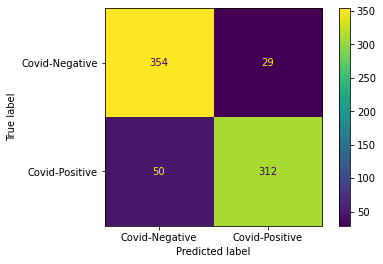

In [23]:
Y_pred = rf.predict(X_test)
print("Accuracy : {}".format(accuracy_score(Y_test, Y_pred)))
print("F1-Score : {}".format(f1_score(Y_test, Y_pred)))
print("Classification Report : ")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix")
conf_mat = confusion_matrix(Y_test, Y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Covid-Negative", "Covid-Positive"])
disp.plot();

We can do the same thing as with Logistic Regression, and use a threshold to decide : 

In [24]:
Y_pred_probas = rf.predict_proba(X_test)
Y_pred_probas = Y_pred_probas[:,1]
DECISION_THRESHOLD = 0.4
Y_pred2 = (Y_pred_probas > DECISION_THRESHOLD).astype(int)

Accuracy : 0.8966442953020134
F1-Score : 0.8988173455978975
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       383
           1       0.86      0.94      0.90       362

    accuracy                           0.90       745
   macro avg       0.90      0.90      0.90       745
weighted avg       0.90      0.90      0.90       745

Confusion Matrix


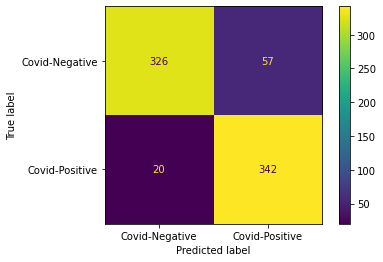

In [25]:
print("Accuracy : {}".format(accuracy_score(Y_test, Y_pred2)))
print("F1-Score : {}".format(f1_score(Y_test, Y_pred2)))
print("Classification Report : ")
print(classification_report(Y_test, Y_pred2))
print("Confusion Matrix")
conf_mat = confusion_matrix(Y_test, Y_pred2, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Covid-Negative", "Covid-Positive"])
disp.plot();

We can see here that we get far less false negative than without setting a threshold (0.5 by default)

We can see after this brief analysis that Random Forests performs better on this data, because of its ability to learn non-linear relationships.

We have also seen how simple methods can be used to classify images. Although, these methods do not take into consideration the spatial aspect of the image, and an important part is thus lost.
- To fix this problem, we need to use methods that consider the spatial correlations of the data. Such as Convolutional Neural Networks, or SKDA (Spatial Kernel Discriminant Analysis)